# Geochemical soil properties

### This dataset contains geochemical analysis of soil samples collected at various depths. Each row represents a sample taken from a specific depth interval, and the columns include concentrations of different chemical elements and oxides (e.g., Al, As, Ba, Si, Ti). The data shows vertical distribution of elements in the soil, so we can observe mineral content across layers. 

Data source: https://www.dinoloket.nl/ondergrondgegevens

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import fiona
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import os

Here we are loading data only for one location (B45G006). The data set containts 5 other locations. All locations are accessible through DINOlocket from where the data was access on request.

In [2]:
# load the data
current_dir = os.getcwd()

# go one folder back using
parent_dir = os.path.dirname(current_dir)

soil_chem_path = os.path.join(parent_dir, "data", "soil_chem_data", "DINO_GeologischBooronderzoekChemischeAnalyse", "B45G0006.csv")

In [3]:
soil_chem = pd.read_csv(soil_chem_path, skiprows=4) # skip first 4 rows, as they are non-important

soil_chem.columns = soil_chem.iloc[0]
soil_chem = soil_chem[1:].reset_index(drop=True)

In [4]:
soil_chem.head(10)

,NITG-nr,Monster datum,Monster-nr,Deelmonster-nr,Meting nr,Bovenkant monster (m tov MV),Onderkant monster (m tov MV),Al (% Ox.),As (mg/kg),Ba (mg/kg),...,S (mg/kg),Si (% Ox.),Sr (mg/kg),Th (mg/kg),Ti (% Ox.),U (mg/kg),V (mg/kg),Y (mg/kg),Zn (mg/kg),Zr (mg/kg)
0,B45G0006,NaN,L1998-07-9223,1,1,0.0,0.3,2.9472899436950684,2.2960000038146973,142.8000030517578,...,214,90.09349822998047,28.267000198364258,5.300000190734863,.0832500010728836,< 0,15.399999618530273,11.66100025177002,20.297000885009766,213.3990020751953
1,B45G0006,NaN,L1998-07-9224,1,1,0.3,2.5,1.4834599494934082,< 0,101,...,< 0,95.61712646484375,14.843999862670898,4.139999866485596,.021700000390410423,< 0,< 0,8.62600040435791,5.723999977111816,64.06800079345703
2,B45G0006,NaN,L1998-07-9225,1,1,2.5,3.3,1.3409099578857422,.18299999833106995,90.19999694824219,...,< 0,96.05180358886719,13.83899974822998,4.265999794006348,.04924999922513962,< 0,2.5999999046325684,9.53600025177002,6.5289998054504395,239.79600524902344
3,B45G0006,NaN,L1998-07-9226,1,1,3.3,6.0,5.712200164794922,5.546000003814697,201.60000610351562,...,644.7000122070312,86.04419708251953,48.00400161743164,9.737000465393066,.28637999296188354,< 0,32.400001525878906,28.05500030517578,29.354999542236328,350.5710144042969
4,B45G0006,NaN,L1998-07-9227,1,1,6.0,10.5,1.4073200225830078,.5419999957084656,96.5999984741211,...,< 0,95.73851776123047,15.484000205993652,6.689000129699707,.06143999844789505,.1379999965429306,.4000000059604645,11.291999816894531,7.632999897003174,253.67100524902344
5,B45G0006,NaN,L1998-07-9228,1,1,10.5,11.5,4.278810024261475,2.0799999237060547,179.8000030517578,...,457.3999938964844,88.09464263916016,39.72800064086914,7.927000045776367,.21338999271392822,< 0,18.600000381469727,18.62700080871582,19.93400001525879,351.2669982910156
6,B45G0006,NaN,L1998-07-9229,1,1,11.5,12.5,9.691720008850098,5.361999988555908,273.5,...,315.3999938964844,78.82228088378906,52.150001525878906,11.192999839782715,.48669999837875366,< 0,56.400001525878906,24.384000778198242,47.547000885009766,392.8340148925781
7,B45G0006,NaN,L1998-07-9230,1,1,12.5,17.0,1.7257499694824219,.9919999837875366,103,...,< 0,95.12883758544922,15.897000312805176,4.306000232696533,.06473000347614288,.8460000157356262,5.800000190734863,10.092000007629395,9.180999755859375,168.3179931640625
8,B45G0006,NaN,L1998-07-9231,1,1,17.0,18.0,1.0589300394058228,.32499998807907104,78.19999694824219,...,< 0,96.26976776123047,10.5,5.122000217437744,.013140000402927399,< 0,< 0,9.0649995803833,6.633999824523926,52.62900161743164
9,B45G0006,NaN,L1998-07-9232,1,1,18.0,22.0,.8859099745750427,< 0,75,...,< 0,96.68477630615234,9.145999908447266,3.4679999351501465,.011099999770522118,< 0,2.200000047683716,9.760000228881836,6.357999801635742,53.55500030517578


Removing special characters ('<') from the values

In [11]:
def clean_numeric(val):
    if isinstance(val, str) and val.strip().startswith("<"):
        try:
            return float(val.strip("<").strip())   # convert "< 0" to just 0
        except:
            return np.nan
    try:
        return float(val)
    except:
        return np.nan

for col in soil_chem.columns:
    try:
        soil_chem[col] = soil_chem[col].apply(clean_numeric)
    except:
        pass

In [12]:
soil_chem.head(10)

,NITG-nr,Monster datum,Monster-nr,Deelmonster-nr,Meting nr,Bovenkant monster (m tov MV),Onderkant monster (m tov MV),Al (% Ox.),As (mg/kg),Ba (mg/kg),...,S (mg/kg),Si (% Ox.),Sr (mg/kg),Th (mg/kg),Ti (% Ox.),U (mg/kg),V (mg/kg),Y (mg/kg),Zn (mg/kg),Zr (mg/kg)
0,NaN,NaN,NaN,1.0,1.0,0.0,0.3,2.94729,2.296,142.800003,...,214.000000,90.093498,28.267000,5.300,0.08325,0.000,15.400000,11.661000,20.297001,213.399002
1,NaN,NaN,NaN,1.0,1.0,0.3,2.5,1.48346,0.000,101.000000,...,0.000000,95.617126,14.844000,4.140,0.02170,0.000,0.000000,8.626000,5.724000,64.068001
2,NaN,NaN,NaN,1.0,1.0,2.5,3.3,1.34091,0.183,90.199997,...,0.000000,96.051804,13.839000,4.266,0.04925,0.000,2.600000,9.536000,6.529000,239.796005
3,NaN,NaN,NaN,1.0,1.0,3.3,6.0,5.71220,5.546,201.600006,...,644.700012,86.044197,48.004002,9.737,0.28638,0.000,32.400002,28.055000,29.355000,350.571014
4,NaN,NaN,NaN,1.0,1.0,6.0,10.5,1.40732,0.542,96.599998,...,0.000000,95.738518,15.484000,6.689,0.06144,0.138,0.400000,11.292000,7.633000,253.671005
5,NaN,NaN,NaN,1.0,1.0,10.5,11.5,4.27881,2.080,179.800003,...,457.399994,88.094643,39.728001,7.927,0.21339,0.000,18.600000,18.627001,19.934000,351.266998
6,NaN,NaN,NaN,1.0,1.0,11.5,12.5,9.69172,5.362,273.500000,...,315.399994,78.822281,52.150002,11.193,0.48670,0.000,56.400002,24.384001,47.547001,392.834015
7,NaN,NaN,NaN,1.0,1.0,12.5,17.0,1.72575,0.992,103.000000,...,0.000000,95.128838,15.897000,4.306,0.06473,0.846,5.800000,10.092000,9.181000,168.317993
8,NaN,NaN,NaN,1.0,1.0,17.0,18.0,1.05893,0.325,78.199997,...,0.000000,96.269768,10.500000,5.122,0.01314,0.000,0.000000,9.065000,6.634000,52.629002
9,NaN,NaN,NaN,1.0,1.0,18.0,22.0,0.88591,0.000,75.000000,...,0.000000,96.684776,9.146000,3.468,0.01110,0.000,2.200000,9.760000,6.358000,53.555000


In [15]:
print(f"Number of layers in the soil: {len(soil_chem)}")

Number of layers in the soil: 75


In [13]:
print(soil_chem.isnull().sum())

0
NITG-nr                         75
Monster datum                   75
Monster-nr                      75
Deelmonster-nr                   0
Meting nr                        0
Bovenkant monster (m tov MV)     0
Onderkant monster (m tov MV)     0
Al (% Ox.)                       1
As (mg/kg)                       1
Ba (mg/kg)                       1
Ca (% Ox.)                       1
Cr (mg/kg)                       1
Cu (mg/kg)                       1
Fe (% Ox.)                       1
Ga (mg/kg)                       1
K (% Ox.)                        1
Mg (% Ox.)                       1
Mn (% Ox.)                       1
Na (% Ox.)                       1
Nb (mg/kg)                       1
Ni (mg/kg)                       1
P (% Ox.)                        1
Pb (mg/kg)                       1
Rb (mg/kg)                       1
S (mg/kg)                        1
Si (% Ox.)                       1
Sr (mg/kg)                       1
Th (mg/kg)                       1
Ti (% Ox.)        

### Quick overview of the dataset

In [17]:
soil_chem.describe(include='all') # info like min, max, range, etc.

,NITG-nr,Monster datum,Monster-nr,Deelmonster-nr,Meting nr,Bovenkant monster (m tov MV),Onderkant monster (m tov MV),Al (% Ox.),As (mg/kg),Ba (mg/kg),...,S (mg/kg),Si (% Ox.),Sr (mg/kg),Th (mg/kg),Ti (% Ox.),U (mg/kg),V (mg/kg),Y (mg/kg),Zn (mg/kg),Zr (mg/kg)
count,0.0,0.0,0.0,75.000000,75.0,75.000000,75.000000,74.000000,74.000000,74.000000,...,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,NaN,NaN,NaN,1.013333,1.0,71.039333,72.894800,5.590014,6.091297,205.813514,...,487.202699,81.174403,82.018730,9.474676,0.260580,0.622068,29.422973,19.009933,27.280689,190.557839
std,NaN,NaN,NaN,0.115470,0.0,38.847825,38.742708,4.015082,7.788609,77.812080,...,959.949690,14.481738,68.889288,4.150571,0.261104,1.044510,31.968116,9.126009,21.650066,141.448691
min,NaN,NaN,NaN,1.000000,1.0,0.000000,0.300000,0.747120,0.000000,67.900002,...,0.000000,46.156231,8.308000,2.426000,0.004550,0.000000,0.000000,8.626000,5.724000,27.787001
25%,NaN,NaN,NaN,1.000000,1.0,39.300000,44.900000,2.511525,2.161000,148.749996,...,21.325000,72.514843,28.737000,6.163500,0.054105,0.000000,4.575000,11.369750,11.422000,72.641251
50%,NaN,NaN,NaN,1.000000,1.0,74.000000,78.800000,4.024100,4.120000,201.250000,...,214.849998,86.208019,58.401001,8.428500,0.107985,0.000000,12.100000,15.382000,17.552500,129.905499
75%,NaN,NaN,NaN,1.000000,1.0,101.100000,102.850000,8.897213,5.854750,261.175011,...,476.599998,92.778618,105.603998,12.711750,0.505585,0.999000,56.475000,27.071250,40.304251,285.887764
max,NaN,NaN,NaN,2.000000,1.0,138.500000,139.500000,16.954189,38.581001,374.200012,...,5746.399902,97.070976,281.058014,19.395000,0.849290,3.940000,136.500000,46.931999,95.047997,568.859985


In [16]:
top_col = 'Bovenkant monster (m tov MV)'
bottom_col = 'Onderkant monster (m tov MV)'
ba_col = 'Ba (mg/kg)'

# sort by top of the layer
df = soil_chem[[top_col, bottom_col, ba_col]].dropna().sort_values(by=top_col)

# layer thickness
df["thickness"] = df[bottom_col] - df[top_col]

Barium content through soil layers

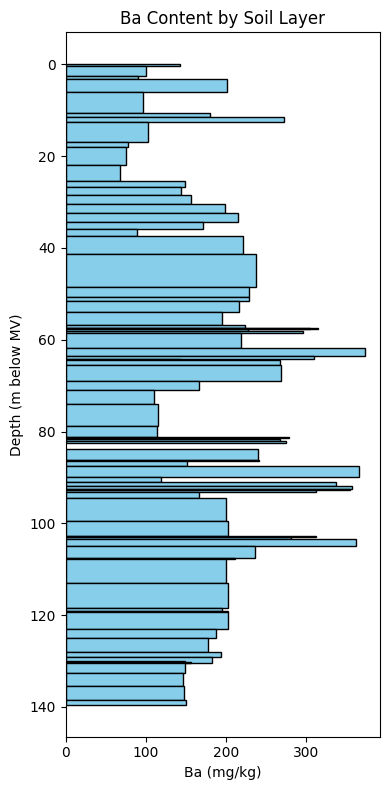

In [18]:
fig, ax = plt.subplots(figsize=(4, 8))

for _, row in df.iterrows():
    ax.barh(
        y=(row[top_col] + row[bottom_col]) / 2,
        width=row[ba_col],       # Ba content
        height=row["thickness"],
        align="center",
        color="skyblue",
        edgecolor="black"
    )

ax.invert_yaxis()
ax.set_xlabel("Ba (mg/kg)")
ax.set_ylabel("Depth (m below MV)")
ax.set_title("Ba Content by Soil Layer")

plt.tight_layout()
plt.show()

In [26]:
loc_path = '/Users/Administrator/Documents/University/Year 3/2b/Thesis/on_request_soil_data/locatie_levering.kml'

gdf_locations = gpd.read_file(loc_path, driver='KML')
gdf_locations = gdf_locations.to_crs(epsg=28992)

fiona.listlayers(loc_path)

/Users/Administrator/Documents/University/Year 3/2b/Thesis/spacial_env/lib/python3.9/site-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'locatie_levering.kml': 'DINO_GeologischBooronderzoekBoorgatMetingen' (default), 'DINO_GeologischBooronderzoekBoormonsterfoto', 'DINO_GeologischBooronderzoekBoormonsterprofiel', 'DINO_GeologischBooronderzoekChemischeAnalyse', 'DINO_GeologischBooronderzoekKorrelgrootteAnalyse'. Specify layer parameter to avoid this warning.
  result = read_func(


['DINO_GeologischBooronderzoekBoorgatMetingen',
 'DINO_GeologischBooronderzoekBoormonsterfoto',
 'DINO_GeologischBooronderzoekBoormonsterprofiel',
 'DINO_GeologischBooronderzoekChemischeAnalyse',
 'DINO_GeologischBooronderzoekKorrelgrootteAnalyse']

In [27]:
# we are interested only in chemical composition of the soil, so we open a corrsponding layer
soil_chem_locations = gpd.read_file(loc_path, driver='KML', layer='DINO_GeologischBooronderzoekChemischeAnalyse')

In [28]:
soil_chem_locations.head()

,Name,Description,geometry
0,B46C0131.csv,,POINT (5.75993 51.59011)
1,B51F0250.csv,,POINT (5.61055 51.57133)
2,B51F0474.csv,,POINT (5.69746 51.56978)
3,B45G0006.csv,,POINT (5.58068 51.61122)
4,B52A0162.csv,,POINT (5.76317 51.54309)


Display all locations from the database on the map.

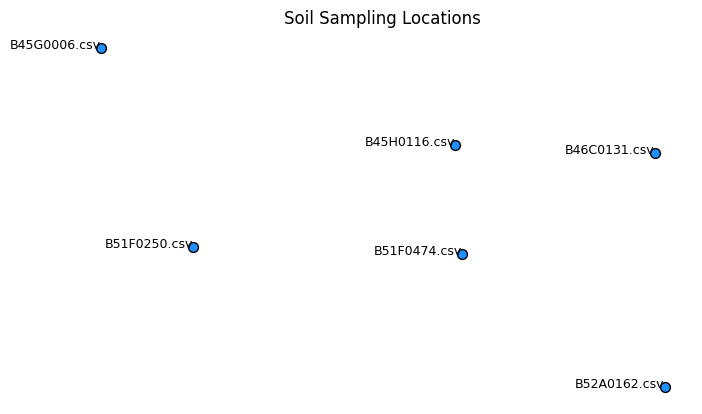

In [32]:
fig, ax = plt.subplots(figsize=(8, 8))
soil_chem_locations.plot(ax=ax, color='dodgerblue', markersize=50, edgecolor='black')

for x, y, label in zip(soil_chem_locations.geometry.x, soil_chem_locations.geometry.y, soil_chem_locations['Name']):
    ax.text(x, y, label, fontsize=9, ha='right')

ax.set_title("Soil Sampling Locations")
ax.set_axis_off()
plt.show()